载入需要的库

In [2]:
library(censReg)
library(ggplot2)

我们首先创建一个数据集

In [4]:
N = 500
x = rnorm(N, 3, 1)
epsi = rnorm(N, 0, 1.5)
y = 2*x -5 + epsi
y_obs = pmax(y, 0)
df = data.frame(x, y, y_obs)

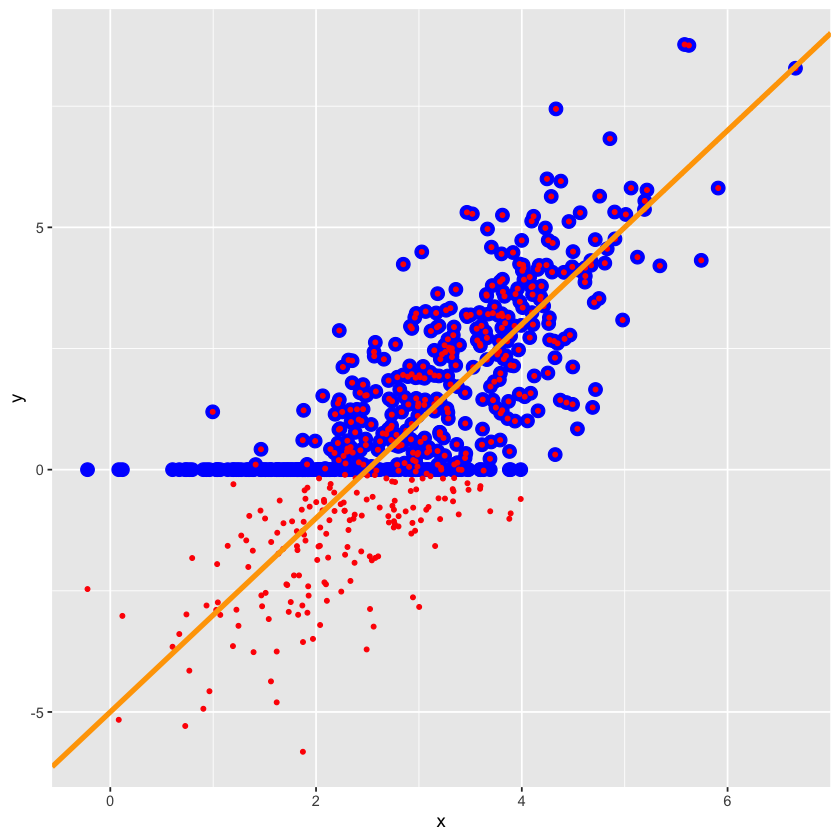

In [5]:
g <- ggplot(data=df, mapping=aes(x=x, y=y))
print(
  g+geom_point(aes(y=y_obs), col='blue', size=3.5) +
  geom_point(aes(y=y), col='red', size=1) +
  geom_abline(slope=2, intercept=-5, col='orange', size=1.5)
)

红点：是我们生成的数据。  
蓝点：我们对y值小于0的替换称0 即$y=max(y, 0)$  
橙线：我们用于产生数据的方程 $y=2x-5+\epsilon$  

__我们需要处理的是在实际场合下常常出现的蓝色的点的拟合__  

In [7]:
df = data.frame(x, y, y_obs)
mask <- df$y_obs > 0 
lm_model <- lm(df$y[mask]~df$x[mask])

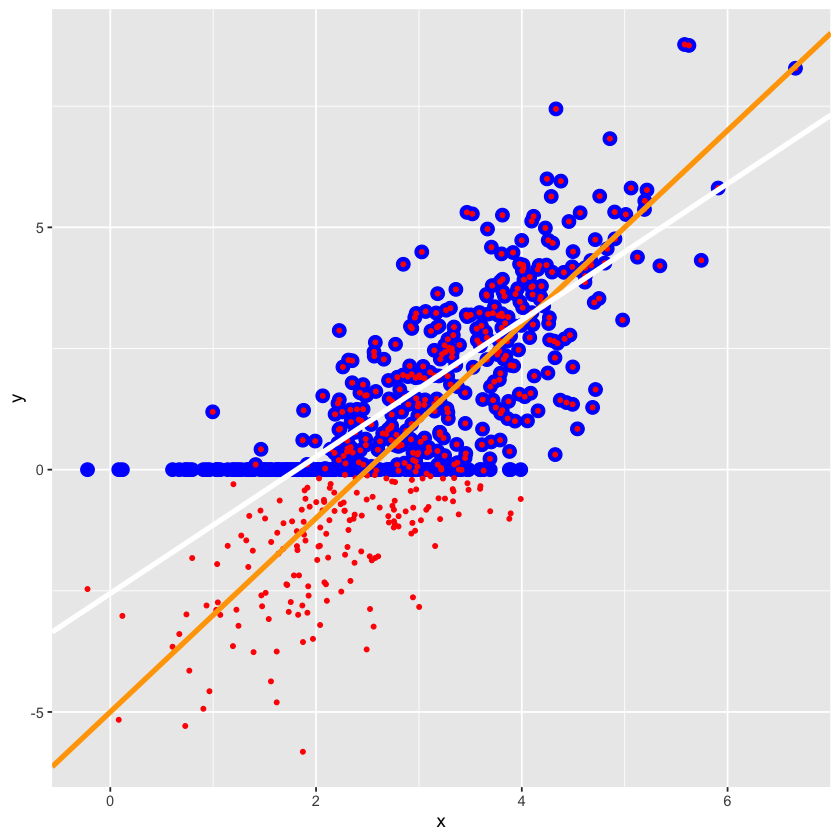

In [8]:
g <- ggplot(data=df, mapping=aes(x=x, y=y))
print(
    g+geom_point(aes(y=y_obs), col='blue', size=3.5) +
    geom_point(aes(y=y), col='red', size=1) +
    geom_abline(slope=2, intercept=-5, col='orange', size=1.5) +
    geom_abline(slope=lm_model$coefficients[2], intercept = lm_model$coefficients[1], col='white', size=1.5)
)

如果我们忽略y=0的数据，仅对非0的数据做拟合，得到白色的拟合线

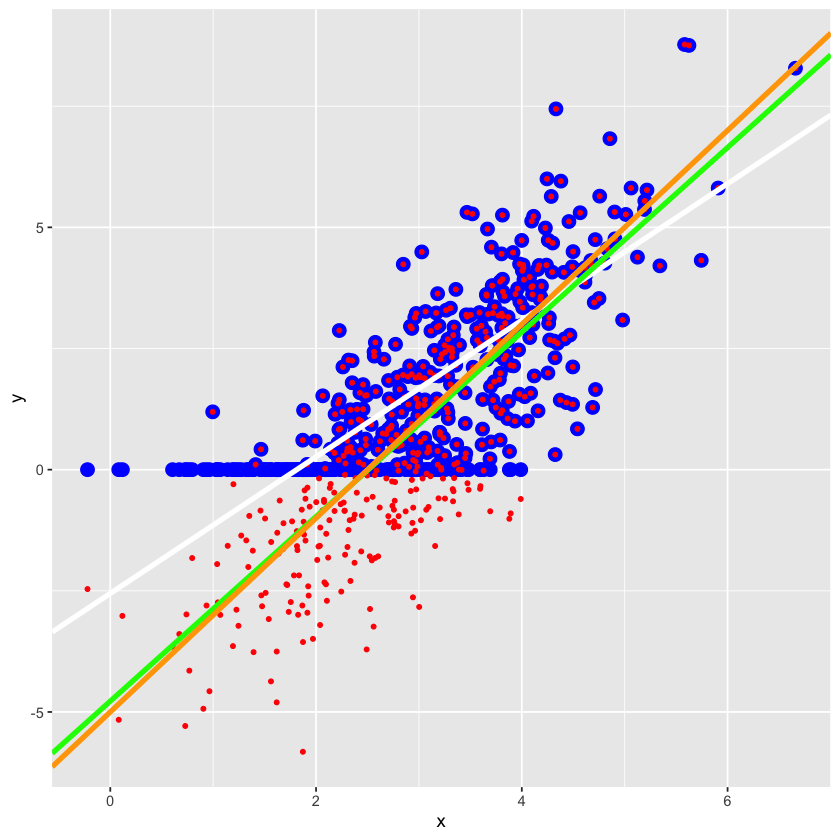

In [9]:
cens_model <- censReg(df$y_obs ~ df$x)

g <- ggplot(data=df, mapping=aes(x=x, y=y))
print(
  g+geom_point(aes(y=y_obs), col='blue', size=3.5) +
  geom_point(aes(y=y), col='red', size=1) +
  geom_abline(slope=lm_model$coefficients[2], intercept = lm_model$coefficients[1], col='white', size=1.5) +
  geom_abline(slope=cens_model$estimate[2], intercept = cens_model$estimate[1], col='green', size=1.5) +
  geom_abline(slope=2, intercept=-5, col='orange', size=1.5) 

)

tobit的拟合效果，绿色线和原橙线的非常接近

In [10]:
summary(cens_model)


Call:
censReg(formula = df$y_obs ~ df$x)

Observations:
         Total  Left-censored     Uncensored Right-censored 
           500            171            329              0 

Coefficients:
            Estimate Std. error t value Pr(> t)    
(Intercept) -4.77664    0.28234 -16.918  <2e-16 ***
df$x         1.90395    0.08254  23.068  <2e-16 ***
logSigma     0.37286    0.04022   9.271  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Newton-Raphson maximisation, 5 iterations
Return code 1: gradient close to zero
Log-likelihood: -685.848 on 3 Df
